In [29]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
from green_concrete.convert import *

%matplotlib inline

## Template

In [30]:
# rundir = os.getcwd()

# filename = '.csv'
# inloc = os.path.join(rundir, 'outputs\\keep', filename)
# outloc = os.path.join(rundir, 'outputs\\plots')

# f = pd.read_csv(inloc)
# f.drop('Unnamed: 0', axis=1, inplace=True)

# cols = ['Unnamed: 2', 'Unnamed: 4']
# data = {}

# # Set the width of the bars
# bar_width = 0.35

# group_labels = []
# colorhash = ['#0076BD', '#5FA845', '#FFBA49', '#976AF5']

# # Create an array for the x-axis positions of the bars
# x = np.arange(len(group_labels))

# fix, ax = plt.subplots()
# ax2 = ax.twinx()

# # Add labels and title with adjusted font size
# plt.ylabel('Levilized Cost of Cement\n($/ton cement)', fontsize=18)
# plt.title('', fontsize=18)
# plt.xticks(x, group_labels, fontsize=18)
# plt.yticks(fontsize=14)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=16)

# # Loop through each group of bars and create a set of bars for each group
# for i, (group, values) in enumerate(data.items()):
#    # Calculate the x-axis position for the current group of bars
#    pos = x + (i * bar_width)
#    # Create a set of bars for the current group
#    ax.bar(pos, values, width=bar_width, label=group)

# plt.ylim(0, 100)

# plt.tight_layout()

# # Save the plot
# plt.savefig(os.path.join(outloc, '.png'), dpi=800)
# # Show the plot

# plt.show()

**Graphs for SULI Research Paper and Poster Presentation** 

*Evan Sharafuddin*

## Comparison with CEMCAP
### Import Data

In [31]:
rundir = os.getcwd()

filename = 'CEMENT_BATCH_cemcap_compare_IA_31-07-2023_11.32.10.csv'
inloc = os.path.join(rundir, 'outputs\\keep', filename)
outloc = os.path.join(rundir, 'outputs\\plots')

f = pd.read_csv(inloc)
f.drop('Unnamed: 0', axis=1, inplace=True)

cols = ['Unnamed: 2', 'Unnamed: 4']
data = f[cols]
my_model_cost = [round(n) for n in f['Unnamed: 2'].values]
my_model_emissions = [round(n) for n in f['Unnamed: 4'].values]

# source for the following: CEMCAP d4.6
cemcap_cost = [round(n) for n in eur2014(1, *[46, 68.4, 77.8])]
cemcap_emissions = [round(n) for n in [
                        850 * .737, # kg/t cli * cli/cem
                        (110-99) * (8760/1e6) * .737 * 1e3, # middle: t/h * h/t cli * cli/cem * kg/t = kg co2/t cem
                        79.1 * .737, # kg/t cli * cli/cem
                    ]] 

### Costs

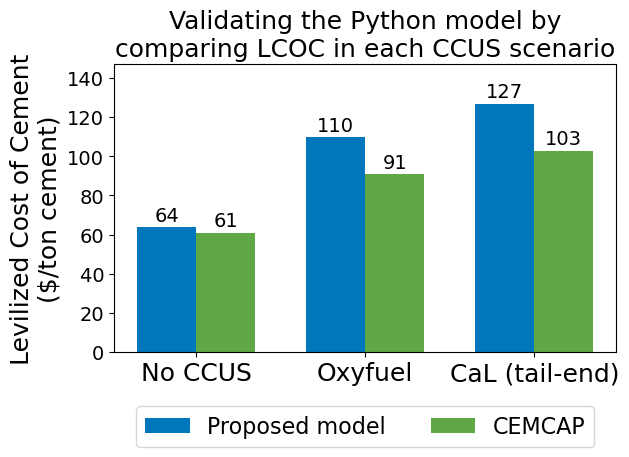

In [32]:
### Costs

# Set the width of the bars
bar_width = 0.35
# figure(figsize=(4, 3), dpi=800)
group_labels = ['No CCUS', 'Oxyfuel', 'CaL (tail-end)']

# Create an array for the x-axis positions of the bars
x = np.arange(len(group_labels))

# Create the bar plot with two adjacent columns for each group
plt.bar(x - bar_width/2, my_model_cost, width=bar_width, label='Proposed model', color='#0076BD')
plt.bar(x + bar_width/2, cemcap_cost, width=bar_width, label='CEMCAP', color='#5FA845')

# Add labels and title with adjusted font size
plt.ylabel('Levilized Cost of Cement\n($/ton cement)', fontsize=18)
plt.title('Validating the Python model by\ncomparing LCOC in each CCUS scenario', fontsize=18)
plt.xticks(x, group_labels, fontsize=18)
plt.yticks(fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=16)

for i, v1, v2 in zip(x, my_model_cost, cemcap_cost):
    plt.text(i - bar_width/2, v1 + 1, str(v1), ha='center', va='bottom', color='black', fontsize=14)
    plt.text(i + bar_width/2, v2 + 1, str(v2), ha='center', va='bottom', color='black', fontsize=14)

plt.ylim(top=max(max(my_model_cost), max(cemcap_cost)) + 20)

plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(outloc, 'cemcap_comparison_cost.png'), dpi=800)
# Show the plot

plt.show()



### Emissions

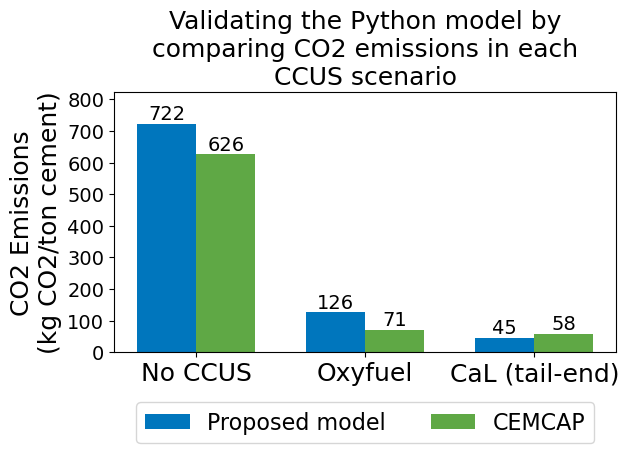

In [33]:
# Set the width of the bars
bar_width = 0.35
# figure(figsize=(4, 3), dpi=800)
group_labels = ['No CCUS', 'Oxyfuel', 'CaL (tail-end)']

# Create an array for the x-axis positions of the bars
x = np.arange(len(group_labels))

# Create the bar plot with two adjacent columns for each group
plt.bar(x - bar_width/2, my_model_emissions, width=bar_width, label='Proposed model', color='#0076BD')
plt.bar(x + bar_width/2, cemcap_emissions, width=bar_width, label='CEMCAP', color='#5FA845')

# Add labels and title
plt.ylabel('CO2 Emissions\n(kg CO2/ton cement)', fontsize=18)
plt.title('Validating the Python model by\ncomparing CO2 emissions in each\nCCUS scenario', fontsize=18)
plt.xticks(x, group_labels, fontsize=18)
plt.yticks(fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=16)

for i, v1, v2 in zip(x, my_model_emissions, cemcap_emissions):
    plt.text(i - bar_width/2, v1 + 1, str(v1), ha='center', va='bottom', color='black', fontsize=14)
    plt.text(i + bar_width/2, v2 + 1, str(v2), ha='center', va='bottom', color='black', fontsize=14)

plt.ylim(top=max(max(my_model_emissions), max(cemcap_emissions)) + 100)
plt.tight_layout()

plt.savefig(os.path.join(outloc, 'cemcap_comparison_emissions.png'), dpi=600)
# Show the plot
plt.show()


## Substituting coal and petcoke with natural gas

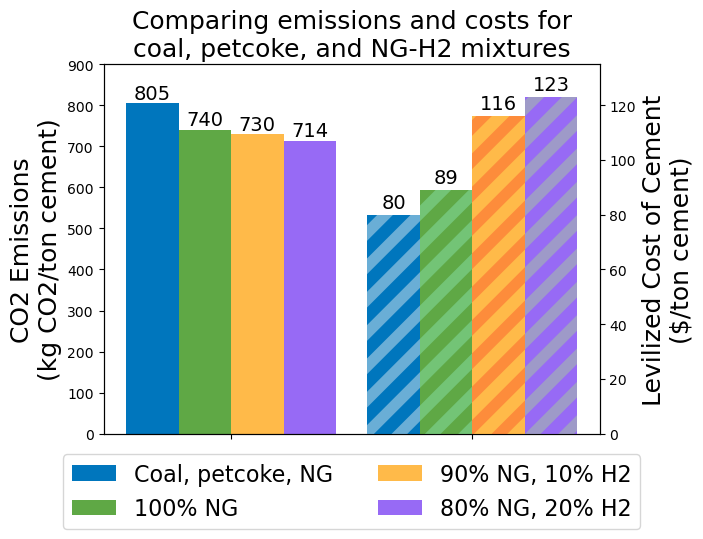

In [34]:
rundir = os.getcwd()

filename = 'CEMENT_BATCH_ng_h2_offgrid_31-07-2023_15.55.23.csv'
inloc = os.path.join(rundir, 'outputs\\keep', filename)
outloc = os.path.join(rundir, 'outputs\\plots')

f = pd.read_csv(inloc)
f.drop('Unnamed: 0', axis=1, inplace=True)

cols = ['Unnamed: 2', 'Unnamed: 4']
data = f[cols]
cost = [round(n) for n in f['Unnamed: 2'].values]
emissions = [round(n) for n in f['Unnamed: 4'].values]

cp_cost = cost[0]
cp_emissions = emissions[0]
ng_cost = cost[1]
ng_emissions = emissions[1]
h21_c = cost[2]
h22_c = cost[3]
h21_e = emissions[2]
h22_e = emissions[3]

# Set the width of the bars
bar_width = 0.25
# figure(figsize=(4, 3), dpi=800)
group_labels = ['Coal, petcoke, NG', '100% NG', '90% NG, 10% H2', '80% NG, 20% H2']


# Create an array for the x-axis positions of the bars
x = np.arange(len(group_labels))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.set_ylim(0, 900)
ax2.set_ylim(0, 135)

ax1.bar(0 - 3 * bar_width/2, cp_emissions, width=bar_width, label=group_labels[0], color='#0076BD')
ax1.bar(0 - bar_width/2, ng_emissions, width=bar_width, label=group_labels[1], color='#5FA845')
ax1.bar(0 + bar_width/2, h21_e, width=bar_width, label=group_labels[2], color='#FFBA49')
ax1.bar(0 + 3 * bar_width/2, h22_e, width=bar_width, label=group_labels[3], color='#976AF5')

plt.rcParams['hatch.linewidth'] = 8
cmap = plt.get_cmap('Blues')
plt.rcParams['hatch.color'] = cmap(0.5)
ax2.bar(1.15 - 3 * bar_width/2, cp_cost, width=bar_width, label=group_labels[0], color='#0076BD', hatch='/')
cmap = plt.get_cmap('Greens')
plt.rcParams['hatch.color'] = cmap(0.5)
ax2.bar(1.15 - bar_width/2, ng_cost, width=bar_width, label=group_labels[1], color='#5FA845', hatch='/')
cmap = plt.get_cmap('Oranges')
plt.rcParams['hatch.color'] = cmap(0.5)
ax2.bar(1.15 + bar_width/2, h21_c, width=bar_width, label=group_labels[2], color='#FFBA49', hatch='/')
cmap = plt.get_cmap('Purples')
plt.rcParams['hatch.color'] = cmap(0.5)
ax2.bar(1.15 + 3 * bar_width/2, h22_c, width=bar_width, label=group_labels[3], color='#976AF5', hatch='/')

# Add labels and title
ax1.set_ylabel('CO2 Emissions\n(kg CO2/ton cement)', fontsize=18)
ax2.set_ylabel('Levilized Cost of Cement\n($/ton cement)', fontsize=18)
plt.title('Comparing emissions and costs for\ncoal, petcoke, and NG-H2 mixtures', fontsize=18)
plt.xticks([0,1.15], ['',''])
# plt.yticks(fontsize=14)

for v, i in zip([cp_emissions, ng_emissions, h21_e, h22_e], x):
    ax1.text(0 - 3*bar_width/2 + 2*(bar_width/2)*i, v + 1, str(v), ha='center', va='bottom', color='black', fontsize=14)

for v, i in zip([cp_cost, ng_cost, h21_c, h22_c], x):
    ax2.text(1.15 - 3*bar_width/2 + 2*(bar_width/2)*i, v + 1, str(v), ha='center', va='bottom', color='black', fontsize=14)


ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.025), ncol=2, fontsize=16)

# ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=2, fontsize=16)
plt.savefig(os.path.join(outloc, 'coal_petcoke_ng.png'), dpi=300)
# Show the plot
plt.show()







## NG-H2 with hybrid plant integration

[102, 116, 112, 123, 191, 202]
{'Cement only': [116, 123, 202], 'Cement and steel': [102, 112, 191]}


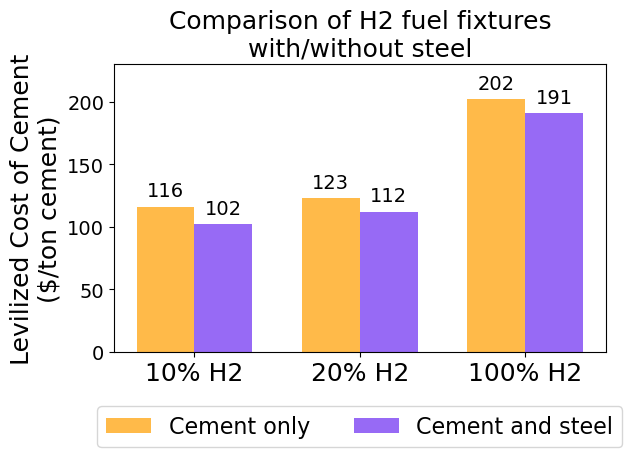

In [83]:
rundir = os.getcwd()

filename = 'CEMENT_BATCH_h2_ng_offgrid_pricecomp_31-07-2023_16.58.00.csv'
inloc = os.path.join(rundir, 'outputs\\keep', filename)
outloc = os.path.join(rundir, 'outputs\\plots')

f = pd.read_csv(inloc)
f.drop('Unnamed: 0', axis=1, inplace=True)

c = [round(n) for n in f['Unnamed: 2'].values]
e = [round(n) for n in f['Unnamed: 4'].values]

print(c)
data = {'Cement only': c[1::2],
        'Cement and steel': c[0:5:2],
}
print(data)
group_labels = ['10% H2', '20% H2', '100% H2']
colorhash = ['#0076BD', '#5FA845', '#FFBA49', '#976AF5'][2:]

# Set the width of the bars
bar_width = 0.35

# Create an array for the x-axis positions of the bars
x = np.arange(len(group_labels))

fix, ax = plt.subplots()
# ax2 = ax.twinx()

# Add labels and title with adjusted font size
plt.ylabel('Levilized Cost of Cement\n($/ton cement)', fontsize=18)
plt.title('Comparison of H2 fuel fixtures\nwith/without steel', fontsize=18)
plt.xticks(x, group_labels, fontsize=18)
plt.yticks(fontsize=14)


# Loop through each group of bars and create a set of bars for each group
for i, (group, values) in enumerate(data.items()):
# Calculate the x-axis position for the current group of bars
    pos = x + (i * bar_width)
    # Create a set of bars for the current group
    bars = ax.bar(pos, values, width=bar_width, label=group, color=colorhash[i])

	# Add text labels above each bar
    for bar, value in zip(bars, values):
    	ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(value),
                ha='center', va='bottom', color='black', fontsize=14)

ax.set_xticks(x + ((len(data) - 1) / 2) * bar_width)
ax.set_xticklabels(group_labels)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=16)
plt.ylim(0, 230)

plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(outloc, '.png'), dpi=800)
# Show the plot

plt.show()

# TODO change this graph, make it like the one below

## CCUS with and without steel plant

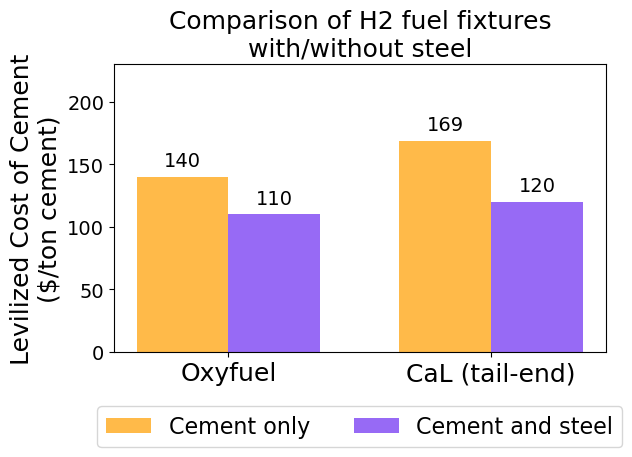

In [36]:
rundir = os.getcwd()

filename = 'CEMENT_BATCH_ccus_steel_31-07-2023_17.49.42.csv'
inloc = os.path.join(rundir, 'outputs\\keep', filename)
outloc = os.path.join(rundir, 'outputs\\plots')

f = pd.read_csv(inloc)
f.drop('Unnamed: 0', axis=1, inplace=True)

c = [round(n) for n in f['Unnamed: 2'].values]
e = [round(n) for n in f['Unnamed: 4'].values]


data = {'Cement only': [c[3], c[5]],
        'Cement and steel': [c[2], c[4]],
}

group_labels = ['Oxyfuel', 'CaL (tail-end)']
colorhash = ['#0076BD', '#5FA845', '#FFBA49', '#976AF5'][2:]

# Set the width of the bars
bar_width = 0.35

# Create an array for the x-axis positions of the bars
x = np.arange(len(group_labels))

fix, ax = plt.subplots()
# ax2 = ax.twinx()

# Add labels and title with adjusted font size
plt.ylabel('Levilized Cost of Cement\n($/ton cement)', fontsize=18)
plt.title('Comparison of H2 fuel fixtures\nwith/without steel', fontsize=18)
plt.xticks(x, group_labels, fontsize=18)
plt.yticks(fontsize=14)


# Loop through each group of bars and create a set of bars for each group
for i, (group, values) in enumerate(data.items()):
# Calculate the x-axis position for the current group of bars
    pos = x + (i * bar_width)
    # Create a set of bars for the current group
    bars = ax.bar(pos, values, width=bar_width, label=group, color=colorhash[i])

	# Add text labels above each bar
    for bar, value in zip(bars, values):
    	ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(value),
                ha='center', va='bottom', color='black', fontsize=14)

ax.set_xticks(x + ((len(data) - 1) / 2) * bar_width)
ax.set_xticklabels(group_labels)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=16)
plt.ylim(0, 230)

plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(outloc, '.png'), dpi=800)
# Show the plot

plt.show()


## Policy

## Carbon emissions pie

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

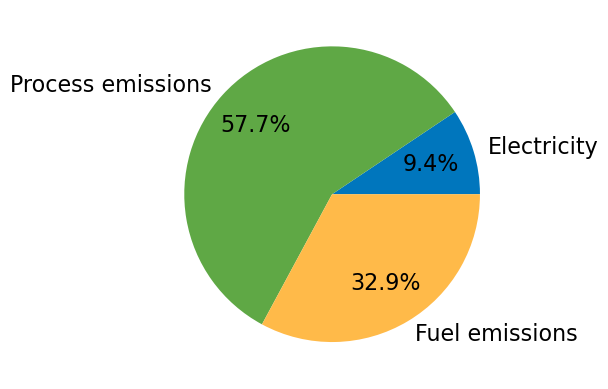

In [37]:
import matplotlib.pyplot as plt
labels = ['Electricity', 'Process emissions', 'Fuel emissions']
colorhash = ['#0076BD', '#5FA845', '#FFBA49', '#976AF5']
sizes = [9.4, 57.8, 32.9]

fig, ax = plt.subplots()
h = ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colorhash[:3], textprops={'fontsize': 16}, pctdistance=.7)
plt.tight_layout

0    109.771187
Name: Unnamed: 2, dtype: float64
US Oxyfuel no-policy 2020
3    115.024638
Name: Unnamed: 2, dtype: float64
US Oxyfuel no-policy 2030
1    98.985191
Name: Unnamed: 2, dtype: float64
US Oxyfuel base 2020
4    104.238642
Name: Unnamed: 2, dtype: float64
US Oxyfuel base 2030
2    55.841206
Name: Unnamed: 2, dtype: float64
US Oxyfuel max 2020
5    61.094656
Name: Unnamed: 2, dtype: float64
US Oxyfuel max 2030
6    120.250453
Name: Unnamed: 2, dtype: float64
US CaL no-policy 2020
9    119.276927
Name: Unnamed: 2, dtype: float64
US CaL no-policy 2030
7    105.10947
Name: Unnamed: 2, dtype: float64
US CaL base 2020
10    104.135944
Name: Unnamed: 2, dtype: float64
US CaL base 2030
8    44.545539
Name: Unnamed: 2, dtype: float64
US CaL max 2020
11    43.572013
Name: Unnamed: 2, dtype: float64
US CaL max 2030
Series([], Name: Unnamed: 2, dtype: float64)
C4 Oxyfuel no-policy 2020
Series([], Name: Unnamed: 2, dtype: float64)
C4 Oxyfuel no-policy 2030
Series([], Name: Unnamed: 2, d

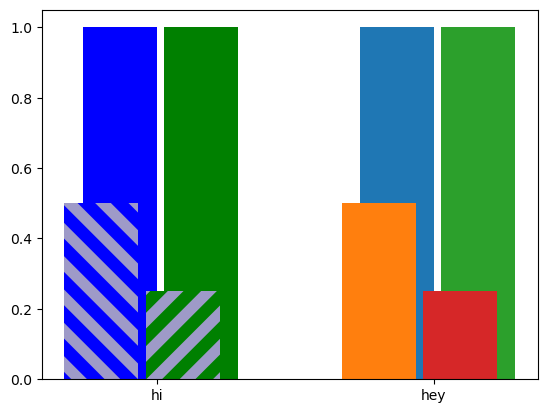

In [95]:
### import data
rundir = os.getcwd()

filename = 'CEMENT_BATCH_test_01-08-2023_16.03.32.csv'
inloc = os.path.join(rundir, 'outputs', filename)
outloc = os.path.join(rundir, 'outputs\\plots')

f = pd.read_csv(inloc)
f.drop('Unnamed: 0', axis=1, inplace=True)

c = f.iloc[:,:2]
c['Unnamed: 2'].apply(round)
f = f.iloc[:, 2:]
f['Unnamed: 4'].apply(round)


### plot config
width = 0.2
bars_per_group = 3
offset = width / 4 
minorspace = width / 2 
majorspace = width 
interval = width * bars_per_group + minorspace * (bars_per_group + 2) + majorspace

fuels = ['US', 'C4', 'C5']
ccus = ['Oxyfuel', 'CaL']
policy = ['no-policy', 'base', 'max']
year = ['2020', '2030']

def check_substrings(s):
    return all(substring in s for substring in substrings_to_check)

x = 0
for i, fuel in enumerate(fuels):
    for cc in ccus:
        for p in policy: 
            for y in year:
                substrings_to_check = [fuel, cc, p, y]
                def check_substrings(s):
                    return all(substring in s for substring in substrings_to_check)
                
                logic = c.iloc[:,0].apply(check_substrings)
                print(c['Unnamed: 2'][logic])
                print(fuel, cc, p, y)
    


colors = ['#0076BD', '#5FA845', '#FFBA49', '#976AF5'][:3]
fig, ax = plt.subplots()

x = [0, 1, 2]

#first strategy is to use hollow bars with fill=False so that they can be reasonably superposed / contained within one another:
ax.bar(0, 1,width=0.2,align='center', fill=True, color = 'b') #the green bar has the smallest width as it is contained within the other two
ax.bar(-0.05, 0.5,width=0.2,align='center', fill=True, color = 'b',hatch='\\') #the blue bar has a greater width than the green bar
# ax.bar(x, k,width=0.4,edgecolor='r',align='center', fill=False) #the widest bar encompasses the other two
ax.bar(0.22, 1,width=0.2,align='center', fill=True, color='g') #the green bar has the smallest width as it is contained within the other two
ax.bar(0.17, 0.25,width=0.2,align='center', fill=True, color='g', hatch='/') #

ax.bar(0+0.75, 1,width=0.2,align='center', fill=True) #the green bar has the smallest width as it is contained within the other two
ax.bar(-0.05+0.75, 0.5,width=0.2,align='center', fill=True) #the blue bar has a greater width than the green bar
# ax.bar(x, k,width=0.4,edgecolor='r',align='center', fill=False) #the widest bar encompasses the other two
ax.bar(0.22+0.75, 1,width=0.2,align='center', fill=True) #the green bar has the smallest width as it is contained within the other two
ax.bar(0.17+0.75, 0.25,width=0.2,align='center', fill=True) #

ax.xaxis.set_ticks([.1, .1+0.75], ['hi', 'hey'])

plt.show()

In [70]:
rundir = os.getcwd()

filename = 'CEMENT_BATCH_test_01-08-2023_16.03.32.csv'
inloc = os.path.join(rundir, 'outputs', filename)
outloc = os.path.join(rundir, 'outputs\\plots')

f = pd.read_csv(inloc)
f.drop('Unnamed: 0', axis=1, inplace=True)

c_col_name = f.columns[0]
logic = ['Oxyfuel' in s for s in f.loc[:, c_col_name]]

c = [round(n) for n in f.loc[logic]['Unnamed: 2'].values]
e = [round(n) for n in f['Unnamed: 4'].values]

